# Land subsidence rates

In [1]:
import os
import pathlib
import sys

import dask
import dask_geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rasterio
import rioxarray
import shapely
import xarray as xr

In [2]:
import uuid

from azure.identity import DefaultAzureCredential
from azure.storage.blob import BlobClient, BlobServiceClient, ContainerClient

In [3]:
account_url = "https://coclico.blob.core.windows.net"
default_credential = DefaultAzureCredential()

# Create the BlobServiceClient object
blob_service_client = BlobServiceClient(account_url, credential=default_credential)

## Listing blobs is not working

I tried using default_credentials and by generating a SAS token. Both fail with httpResponseError (authorization). See below for workaround



In [4]:
import getpass

import azure.storage.blob

sas_token = getpass.getpass()  # prompts for the sas_token
container_client = azure.storage.blob.ContainerClient(
    "https://coclico.blob.core.windows.net",
    container_name="public",
    credential=sas_token,
)

 ········


In [5]:
# container_client = blob_service_client.get_container_client("public")
blob_list = container_client.list_blobs("EGMS*")
for blob in blob_list:
    print("\t" + blob.name)

HttpResponseError: This request is not authorized to perform this operation using this permission.
RequestId:bf25d331-401e-0071-0355-f45d12000000
Time:2022-11-09T16:07:36.6037495Z
ErrorCode:AuthorizationPermissionMismatch
Content: <?xml version="1.0" encoding="utf-8"?><Error><Code>AuthorizationPermissionMismatch</Code><Message>This request is not authorized to perform this operation using this permission.
RequestId:bf25d331-401e-0071-0355-f45d12000000
Time:2022-11-09T16:07:36.6037495Z</Message></Error>

## Copy these strings into a list

not sure why azure cloud is not working. Small workarount to get the hrefs

In [6]:
import pathlib
import pprint

fnames_e = [
    p.name for p in pathlib.Path.home().joinpath("data", "src", "egms").glob("*_E.tiff")
]
fnames_u = [
    p.name for p in pathlib.Path.home().joinpath("data", "src", "egms").glob("*_U.tiff")
]

pprint.pprint(fnames_e)
print("")
pprint.pprint(fnames_u)

['EGMS_L3_E40N33_100km_E.tiff',
 'EGMS_L3_E40N32_100km_E.tiff',
 'EGMS_L3_E38N31_100km_E.tiff',
 'EGMS_L3_E39N31_100km_E.tiff',
 'EGMS_L3_E41N32_100km_E.tiff',
 'EGMS_L3_E41N33_100km_E.tiff',
 'EGMS_L3_E41N34_100km_E.tiff',
 'EGMS_L3_E39N32_100km_E.tiff',
 'EGMS_L3_E41N31_100km_E.tiff',
 'EGMS_L3_E39N33_100km_E.tiff',
 'EGMS_L3_E40N31_100km_E.tiff',
 'EGMS_L3_E38N32_100km_E.tiff']

['EGMS_L3_E39N33_100km_U.tiff',
 'EGMS_L3_E39N32_100km_U.tiff',
 'EGMS_L3_E41N31_100km_U.tiff',
 'EGMS_L3_E40N31_100km_U.tiff',
 'EGMS_L3_E38N32_100km_U.tiff',
 'EGMS_L3_E40N32_100km_U.tiff',
 'EGMS_L3_E38N31_100km_U.tiff',
 'EGMS_L3_E40N33_100km_U.tiff',
 'EGMS_L3_E41N33_100km_U.tiff',
 'EGMS_L3_E41N34_100km_U.tiff',
 'EGMS_L3_E39N31_100km_U.tiff',
 'EGMS_L3_E41N32_100km_U.tiff']


## If the files are not available on local machine 

In [7]:
container_basename = "https://coclico.blob.core.windows.net/public"
hrefs_e = [os.path.join(container_basename, fn) for fn in fnames_e]
hrefs_u = [os.path.join(container_basename, fn) for fn in fnames_u]

In [31]:
data_e = xr.open_mfdataset(hrefs_e, engine="rasterio")
data_u = xr.open_mfdataset(hrefs_u, engine="rasterio")

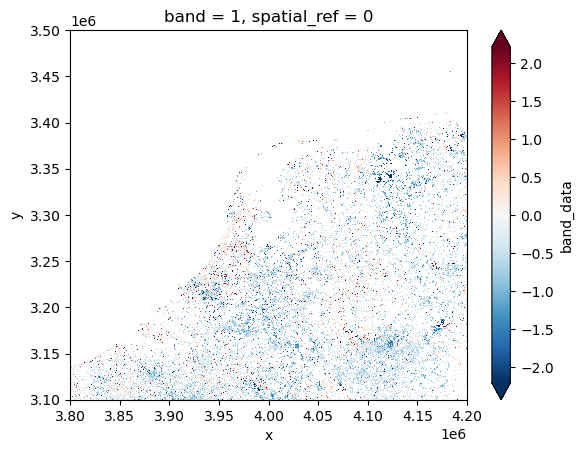

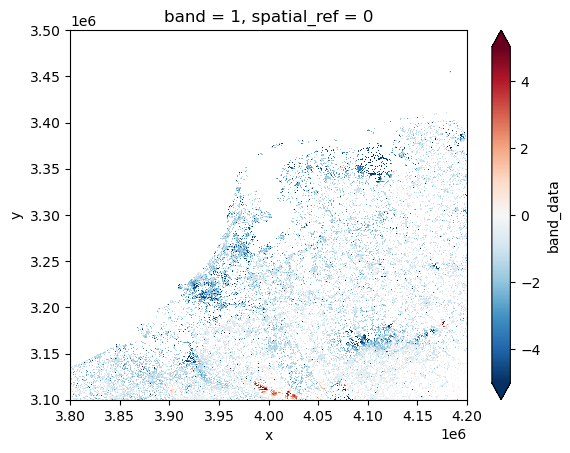

In [35]:
data_e["band_data"].squeeze().plot.imshow(robust=True)
plt.show()
data_u["band_data"].squeeze().plot.imshow(robust=True)